In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path

In [3]:
bs = 32

In [16]:
path = Path('../data/dogs-vs-cats-redux-kernels-edition/')
path_train = path/'train'
path_test = path/'test'

In [17]:
fnames = get_image_files(path_train)
fnames

[PosixPath('../data/dogs-vs-cats-redux-kernels-edition/train/cat.4423.jpg'),
 PosixPath('../data/dogs-vs-cats-redux-kernels-edition/train/dog.1702.jpg'),
 PosixPath('../data/dogs-vs-cats-redux-kernels-edition/train/dog.3184.jpg'),
 PosixPath('../data/dogs-vs-cats-redux-kernels-edition/train/dog.11705.jpg'),
 PosixPath('../data/dogs-vs-cats-redux-kernels-edition/train/dog.3052.jpg'),
 PosixPath('../data/dogs-vs-cats-redux-kernels-edition/train/cat.6584.jpg'),
 PosixPath('../data/dogs-vs-cats-redux-kernels-edition/train/cat.5495.jpg'),
 PosixPath('../data/dogs-vs-cats-redux-kernels-edition/train/cat.5722.jpg'),
 PosixPath('../data/dogs-vs-cats-redux-kernels-edition/train/cat.342.jpg'),
 PosixPath('../data/dogs-vs-cats-redux-kernels-edition/train/cat.12390.jpg'),
 PosixPath('../data/dogs-vs-cats-redux-kernels-edition/train/cat.7333.jpg'),
 PosixPath('../data/dogs-vs-cats-redux-kernels-edition/train/dog.1907.jpg'),
 PosixPath('../data/dogs-vs-cats-redux-kernels-edition/train/dog.4833.jpg')

In [22]:
np.random.seed(42)
pat = r'/([^/]+)\.\d+.jpg$'

In [53]:
data = ImageDataBunch.from_name_re(path, fnames, pat, test='test', ds_tfms=get_transforms(), 
                                   size=224, bs=bs).normalize(imagenet_stats)

In [54]:
help(ImageDataBunch.from_folder)

Help on method from_folder in module fastai.vision.data:

from_folder(path: Union[pathlib.Path, str], train: Union[pathlib.Path, str] = 'train', valid: Union[pathlib.Path, str] = 'valid', valid_pct=None, seed: int = None, classes: Collection = None, **kwargs: Any) -> 'ImageDataBunch' method of builtins.type instance
    Create from imagenet style dataset in `path` with `train`,`valid`,`test` subfolders (or provide `valid_pct`).



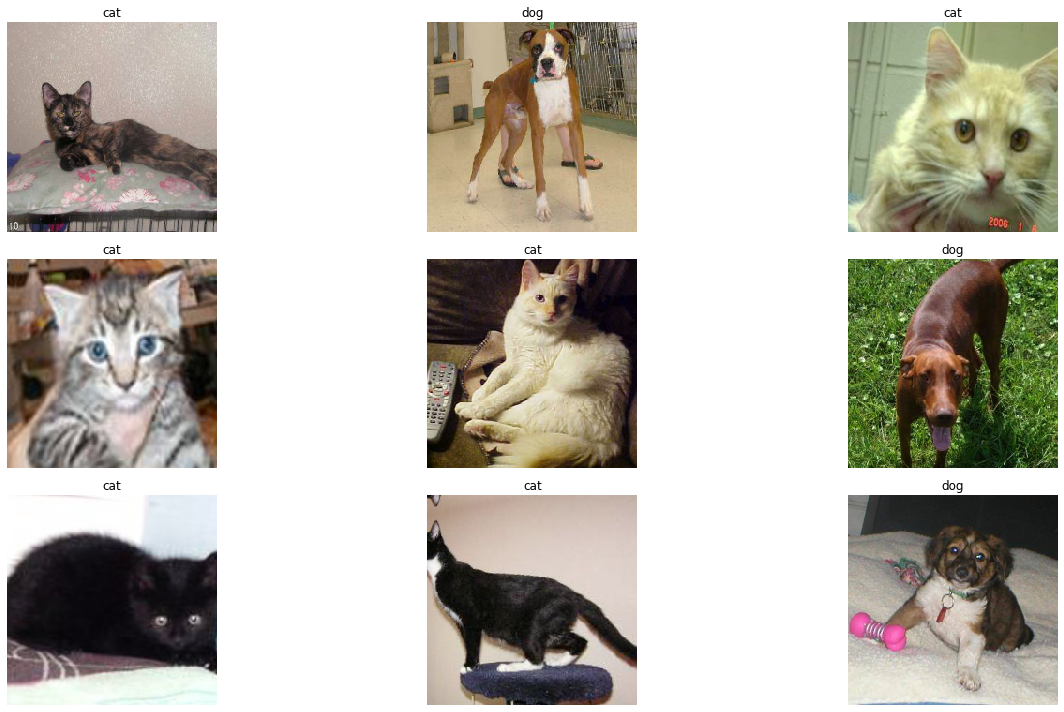

In [55]:
data.show_batch(rows=3, figsize=(20, 10))

In [56]:
print(data.classes)
len(data.classes), data.c

['cat', 'dog']


(2, 2)

In [57]:
data

ImageDataBunch;

Train: LabelList (20000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cat,dog,dog,dog,dog
Path: ../data/dogs-vs-cats-redux-kernels-edition;

Valid: LabelList (5000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dog,cat,dog,cat,dog
Path: ../data/dogs-vs-cats-redux-kernels-edition;

Test: LabelList (12500 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: ../data/dogs-vs-cats-redux-kernels-edition

In [59]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [60]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


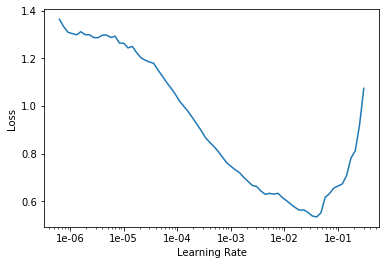

In [61]:
learn.recorder.plot()

In [62]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.097340,0.042401,0.015000,01:34
1,0.092191,0.026527,0.009600,01:36
2,0.073984,0.028862,0.008200,01:35
3,0.044932,0.023889,0.007600,01:35
4,0.040623,0.020135,0.007800,01:36
5,0.023574,0.021265,0.007200,01:36
6,0.042355,0.021377,0.007000,01:35
7,0.019616,0.021580,0.007200,01:36


In [63]:
learn.save('stage-1-50')

In [64]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-5, 1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.144827,0.088583,0.035000,02:06
1,0.081444,0.070000,0.024600,02:07
2,0.039166,0.026882,0.009200,02:07


In [65]:
learn.load('stage-1-50')

Learner(data=ImageDataBunch;

Train: LabelList (20000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cat,dog,dog,dog,dog
Path: ../data/dogs-vs-cats-redux-kernels-edition;

Valid: LabelList (5000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dog,cat,dog,cat,dog
Path: ../data/dogs-vs-cats-redux-kernels-edition;

Test: LabelList (12500 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: ../data/dogs-vs-cats-redux-kernels-edition, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1

In [66]:
interp = ClassificationInterpretation.from_learner(learn)

In [67]:
interp.most_confused(min_val=2)

[('cat', 'dog', 20), ('dog', 'cat', 16)]

In [68]:
learn.get_preds(ds_type=DatasetType.Test)

[tensor([[7.8472e-11, 1.0000e+00],
         [3.1438e-03, 9.9686e-01],
         [6.2605e-07, 1.0000e+00],
         ...,
         [9.9981e-01, 1.8811e-04],
         [7.0573e-06, 9.9999e-01],
         [9.9998e-01, 2.0326e-05]]), tensor([0, 0, 0,  ..., 0, 0, 0])]

In [ ]:
k